# Part 2: ÊôÇÁ©∫ËôïÁêÜËàáÂÑ≤Â≠òÂÑ™Âåñ

ÈÄôÂÄã notebook ÊúÉ‰ªãÁ¥πÔºö

1. **ÊôÇÈñì Resampling**Ôºöhourly ‚Üí dailyÔºåË®àÁÆóÁµ±Ë®àÈáè
2. **Á©∫Èñì Reproject**Ôºö
3. **Â§öÊ™îÊ°àËÆÄÂèñ**Ôºö‰ΩøÁî®Â§öÂπ¥Ë≥áÊñô
4. **Á©∫ÈñìÁµ±Ë®à**ÔºöÂçÄÂüüÂπ≥Âùá„ÄÅgradient Ë®àÁÆó
5. **Rechunking Á≠ñÁï•**ÔºöÊ†πÊìöÂàÜÊûêÊ®°ÂºèË™øÊï¥ chunk
6. **ÂÑ≤Â≠òÁÇ∫ Zarr**ÔºöÂÑ™Âåñ metadata ÂíåÂ£ìÁ∏ÆË®≠ÂÆö

---

## Â≠∏ÁøíÁõÆÊ®ô

- ÊéåÊè° `.resample()` Âíå `.groupby()` ÁöÑÊôÇÈñìËÅöÂêà
- ÁêÜËß£Â§öÊ™îÊ°àËÆÄÂèñÁöÑË®òÊÜ∂È´îÁÆ°ÁêÜ
- Â≠∏ÊúÉÈÅ∏ÊìáÂêàÈÅ©ÁöÑ chunking Á≠ñÁï•
- Ê≠£Á¢∫ÂÑ≤Â≠ò‰∏≠ÈñìÁµêÊûúÔºåÈÅøÂÖçÈáçË§áË®àÁÆó

## 0. Áí∞Â¢ÉÊ∫ñÂÇô

In [1]:
import dask
from dask.distributed import Client
import xarray as xr
import intake
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ÂïüÂãï Dask Client
client = Client(processes=False, n_workers=4, threads_per_worker=2, memory_limit='4GB')
print(f"Dask Dashboard: {client.dashboard_link}")

# ËºâÂÖ• catalog
catalog = intake.open_catalog('catalog.yaml')

Dask Dashboard: http://140.112.13.64:8787/status


## 1. ÊôÇÈñì ResamplingÔºöHourly ‚Üí Daily

### ÁÇ∫‰ªÄÈ∫ºÈúÄË¶Å ResamplingÔºü

ÂéüÂßã ERA5 Ë≥áÊñôÊòØ hourlyÔºå‰ΩÜË®±Â§öÂàÜÊûêÈúÄË¶ÅÔºö
- **Daily mean**ÔºöÊó•Âπ≥ÂùáÊ∫´Â∫¶„ÄÅÊøïÂ∫¶
- **Daily max**ÔºöÊó•ÊúÄÂ§ß CAPEÔºàÂ∞çÊµÅÊΩõÂã¢Ôºâ
- **Daily accumulation**ÔºöÊó•Á¥ØÁ©çÈôçÈõ®

Resampling ÁöÑÂÑ™Âã¢Ôºö
1. **Ê∏õÂ∞ëË≥áÊñôÈáè**Ôºö8760 hours ‚Üí 365 days (Ê∏õÂ∞ë 24 ÂÄç)
2. **Èôç‰ΩéÈõúË®ä**ÔºöÂπ≥ÊªëÁü≠ÊúüÊ≥¢Âãï
3. **Á¨¶ÂêàÂàÜÊûêÈúÄÊ±Ç**ÔºöË®±Â§öÊ∞£ÂÄôÊåáÊ®ôÊòØ daily Â∞∫Â∫¶

### Xarray ÁöÑ `.resample()` ÊñπÊ≥ï

`.resample()` È°û‰ºº pandasÔºå‰ΩÜÊòØ **lazy** ÁöÑÔºö
```python
ds.resample(time='1D').mean()  # ‰∏çÊúÉÁ´ãÂç≥Âü∑Ë°å
```

In [2]:
# ËºâÂÖ• 2019 Âπ¥Ë≥áÊñô
# ds = catalog.era5_2019_raw.to_dask() # ‰Ω†ÂèØ‰ª•ÊãøÂèñÊØîËºÉÂÖ©ËÄÖÁöÑÈÄüÂ∫¶
ds = catalog.era5_2019_chunked.to_dask()


print("ÂéüÂßãË≥áÊñôÔºö")
print(f"  Time range: {ds.time.values[0]} to {ds.time.values[-1]}")
print(f"  Time steps: {len(ds.time)}")
print(f"  Frequency: hourly")
print(f"  Size: {ds.nbytes / 1e9:.2f} GB")

ÂéüÂßãË≥áÊñôÔºö
  Time range: 2019-01-01T00:00:00.000000000 to 2019-12-31T23:00:00.000000000
  Time steps: 8760
  Frequency: hourly
  Size: 21.84 GB


### 1.1 Ë®àÁÆó Daily Mean

In [3]:
# Daily mean
ds_daily_mean = ds.resample(time='1D').mean()

print("Daily mean:")
print(f"  Time steps: {len(ds_daily_mean.time)}")
print(f"  Size: {ds_daily_mean.nbytes / 1e9:.2f} GB")
print(f"  Reduction: {ds.nbytes / ds_daily_mean.nbytes:.1f}x")
print()
print(ds_daily_mean)

Daily mean:
  Time steps: 365
  Size: 0.91 GB
  Reduction: 24.0x

<xarray.Dataset> Size: 910MB
Dimensions:                                (time: 365, latitude: 121,
                                            longitude: 161, level: 4)
Coordinates:
  * time                                   (time) datetime64[ns] 3kB 2019-01-...
  * latitude                               (latitude) float32 484B 40.0 ... 10.0
  * longitude                              (longitude) float32 644B 100.0 ......
  * level                                  (level) int64 32B 300 500 700 850
Data variables: (12/17)
    100m_u_component_of_wind               (time, latitude, longitude) float32 28MB dask.array<chunksize=(1, 121, 161), meta=np.ndarray>
    100m_v_component_of_wind               (time, latitude, longitude) float32 28MB dask.array<chunksize=(1, 121, 161), meta=np.ndarray>
    10m_u_component_of_wind                (time, latitude, longitude) float32 28MB dask.array<chunksize=(1, 121, 161), meta=np.ndarra

### 1.2 ‰∏çÂêåËÆäÊï∏‰ΩøÁî®‰∏çÂêåÁµ±Ë®àÈáè

Â∞çÊñºÂ∞çÊµÅÈ†êÂ†±ÔºåÊàëÂÄëÂèØËÉΩÈúÄË¶ÅÔºö
- **CAPE**: daily maximumÔºàÊúÄÂ§ß‰∏çÁ©©ÂÆöÂ∫¶Ôºâ
- **CIN**: daily meanÔºàÂπ≥ÂùáÊäëÂà∂Ôºâ
- **K-index**: daily mean
- **BLH**: daily maximumÔºàÊúÄÈ´òÈÇäÁïåÂ±§Ôºâ

Xarray ÂÖÅË®±Â∞ç‰∏çÂêåËÆäÊï∏ÂÅö‰∏çÂêåÊìç‰ΩúÔºö

In [4]:
ds

<xarray.Dataset> Size: 22GB
Dimensions:                                (time: 8760, latitude: 121,
                                            longitude: 161, level: 4)
Coordinates:
  * time                                   (time) datetime64[ns] 70kB 2019-01...
  * latitude                               (latitude) float32 484B 40.0 ... 10.0
  * longitude                              (longitude) float32 644B 100.0 ......
  * level                                  (level) int64 32B 300 500 700 850
Data variables: (12/17)
    100m_u_component_of_wind               (time, latitude, longitude) float32 683MB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    100m_v_component_of_wind               (time, latitude, longitude) float32 683MB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    10m_u_component_of_wind                (time, latitude, longitude) float32 683MB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    10m_v_component_of_wind                (time, latitude, longitude) float32 683MB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    boundary_layer_height                  (time, latitude, longitude) float32 683MB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    convective_available_potential_energy  (time, latitude, longitude) float32 683MB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    ...                                     ...
    specific_humidity                      (time, level, latitude, longitude) float32 3GB dask.array<chunksize=(360, 4, 121, 161), meta=np.ndarray>
    surface_pressure                       (time, latitude, longitude) float32 683MB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    temperature                            (time, level, latitude, longitude) float32 3GB dask.array<chunksize=(360, 4, 121, 161), meta=np.ndarray>
    total_precipitation                    (time, latitude, longitude) float32 683MB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    u_component_of_wind                    (time, level, latitude, longitude) float32 3GB dask.array<chunksize=(360, 4, 121, 161), meta=np.ndarray>
    v_component_of_wind                    (time, level, latitude, longitude) float32 3GB dask.array<chunksize=(360, 4, 121, 161), meta=np.ndarray>
Attributes:
    last_updated:           2025-07-18 02:02:45.511267+00:00
    valid_time_start:       1940-01-01
    valid_time_stop:        2025-04-30
    valid_time_stop_era5t:  2025-07-12

In [5]:
# ÂàÜÂà•Ë®àÁÆó
cape_daily_max = ds['convective_available_potential_energy'].resample(time='1D').max()
cin_daily_mean = ds['convective_inhibition'].resample(time='1D').mean()
kindex_daily_mean = ds['k_index'].resample(time='1D').mean()
blh_daily_max = ds['boundary_layer_height'].resample(time='1D').max()

# Âêà‰ΩµÊàêÊñ∞ÁöÑ Dataset (ÊääÂ§öÂÄã DataArray ÂåÖÊàê‰∏ÄÂÄã Dataset)
ds_daily = xr.Dataset({
    'cape_max': cape_daily_max,
    'cin_mean': cin_daily_mean,
    'kindex_mean': kindex_daily_mean,
    'blh_max': blh_daily_max
})

print("Custom daily statistics:")
print(ds_daily)

Custom daily statistics:
<xarray.Dataset> Size: 114MB
Dimensions:      (latitude: 121, longitude: 161, time: 365)
Coordinates:
  * latitude     (latitude) float32 484B 40.0 39.75 39.5 ... 10.5 10.25 10.0
  * longitude    (longitude) float32 644B 100.0 100.2 100.5 ... 139.8 140.0
  * time         (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2019-12-31
Data variables:
    cape_max     (time, latitude, longitude) float32 28MB dask.array<chunksize=(1, 121, 161), meta=np.ndarray>
    cin_mean     (time, latitude, longitude) float32 28MB dask.array<chunksize=(1, 121, 161), meta=np.ndarray>
    kindex_mean  (time, latitude, longitude) float32 28MB dask.array<chunksize=(1, 121, 161), meta=np.ndarray>
    blh_max      (time, latitude, longitude) float32 28MB dask.array<chunksize=(1, 121, 161), meta=np.ndarray>


### 1.3 Âü∑Ë°å‰∏¶Ë¶ñË¶∫ÂåñÁµêÊûú

ÊàëÂÄëÈÅ∏ÂèñÂè∞ÁÅ£ÈôÑËøëÂçÄÂüüÔºåË®àÁÆó‰∏¶Áπ™Âúñ„ÄÇ

In [6]:
ds_taiwan_july = ds_daily.sel(
    time='2019-07',
    latitude=slice(26, 22),
    longitude=slice(120, 124)
)
ds_taiwan_july

<xarray.Dataset> Size: 144kB
Dimensions:      (latitude: 17, longitude: 17, time: 31)
Coordinates:
  * latitude     (latitude) float32 68B 26.0 25.75 25.5 ... 22.5 22.25 22.0
  * longitude    (longitude) float32 68B 120.0 120.2 120.5 ... 123.5 123.8 124.0
  * time         (time) datetime64[ns] 248B 2019-07-01 2019-07-02 ... 2019-07-31
Data variables:
    cape_max     (time, latitude, longitude) float32 36kB dask.array<chunksize=(1, 17, 17), meta=np.ndarray>
    cin_mean     (time, latitude, longitude) float32 36kB dask.array<chunksize=(1, 17, 17), meta=np.ndarray>
    kindex_mean  (time, latitude, longitude) float32 36kB dask.array<chunksize=(1, 17, 17), meta=np.ndarray>
    blh_max      (time, latitude, longitude) float32 36kB dask.array<chunksize=(1, 17, 17), meta=np.ndarray>

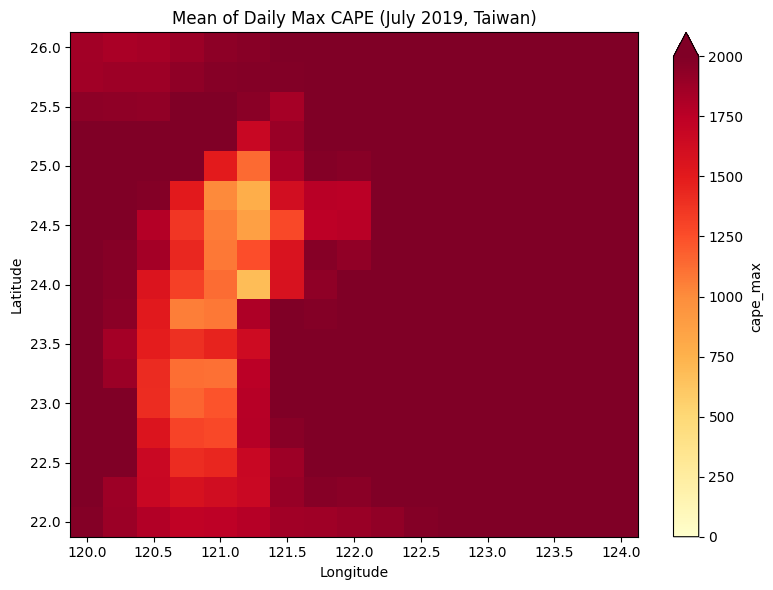

In [7]:
# Ë®àÁÆóÊúàÂπ≥Âùá
cape_monthly = ds_taiwan_july['cape_max'].mean(dim='time').compute()

# Áπ™Âúñ
plt.figure(figsize=(8, 6))
cape_monthly.plot(cmap='YlOrRd', vmin=0, vmax=2000)
plt.title('Mean of Daily Max CAPE (July 2019, Taiwan)', fontsize=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

## 2. Â§öÊ™îÊ°àËÆÄÂèñÔºöË∑®Âπ¥Â∫¶ÂàÜÊûê

### ÊÉÖÂ¢ÉÔºöË®àÁÆó 2019-2023 Âπ¥ÁöÑÊ∞£ÂÄôÊÖã

Ê∞£ÂÄôÊÖãÔºàclimatologyÔºâ= Â§öÂπ¥Âπ≥ÂùáÁöÑÂ≠£ÁØÄËÆäÂåñ„ÄÇ‰æãÂ¶ÇÔºö
- 1 ÊúàÁöÑÂπ≥Âùá CAPE
- 7 ÊúàÁöÑÂπ≥Âùá BLH

ÈÄôÈúÄË¶ÅËÆÄÂèñÊâÄÊúâÂπ¥‰ªΩÁöÑË≥áÊñô„ÄÇ

### ÊñπÊ≥ï 1ÔºöÈÄêÂπ¥ËÆÄÂèñ‰∏¶‰∏≤Êé•

In [8]:
# Ê≤øËëóÊôÇÈñìËª∏‰∏≤Êé•
ds_all = catalog.era5_all_years.to_dask()
print(ds_all)

<xarray.Dataset> Size: 109GB
Dimensions:                                (time: 43824, latitude: 121,
                                            longitude: 161, level: 4)
Coordinates:
  * time                                   (time) datetime64[ns] 351kB 2019-0...
  * latitude                               (latitude) float32 484B 40.0 ... 10.0
  * longitude                              (longitude) float32 644B 100.0 ......
  * level                                  (level) int64 32B 300 500 700 850
Data variables: (12/17)
    100m_u_component_of_wind               (time, latitude, longitude) float32 3GB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    100m_v_component_of_wind               (time, latitude, longitude) float32 3GB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    10m_u_component_of_wind                (time, latitude, longitude) float32 3GB dask.array<chunksize=(360, 121, 161), meta=np.ndarray>
    10m_v_component_of_wind                (time, latitude

### ÈáçË¶ÅÔºöÈÄôË£°Ê≤íÊúâËºâÂÖ•Ë≥áÊñôÔºÅ

ÈõñÁÑ∂ÊàëÂÄë„Äå‰∏≤Êé•„Äç‰∫Ü 5 Âπ¥Ë≥áÊñôÔºà~100 GBÔºâÔºå‰ΩÜÂØ¶Èöõ‰∏äÔºö
- **Ê≤íÊúâËÆÄÂèñ‰ªª‰Ωï Zarr Ê™îÊ°à**
- **Ê≤íÊúâ‰ΩîÁî® 100 GB Ë®òÊÜ∂È´î**
- Âè™ÊòØÂª∫Á´ã‰∫Ü‰∏ÄÂÄã**ËôõÊì¨ÁöÑ Dataset**ÔºåË®òÈåÑ‰∫ÜË≥áÊñôÁöÑ‰ΩçÁΩÆ

ÈÄôÂ∞±ÊòØ lazy evaluation ÁöÑÂ®ÅÂäõ„ÄÇ

## 3. Ë®àÁÆóÊ∞£ÂÄôÊÖãÔºöGroupby Êìç‰Ωú

### ‰ªÄÈ∫ºÊòØ GroupbyÔºü

Groupby ÊòØ„Äåsplit-apply-combine„ÄçÊ®°ÂºèÔºö
1. **Split**ÔºöÊåâÁÖßÊüêÂÄãË¶èÂâáÂàÜÁµÑÔºà‰æãÂ¶ÇÊåâÊúà‰ªΩÔºâ
2. **Apply**ÔºöÂ∞çÊØèÁµÑÂÅöÁõ∏ÂêåÊìç‰ΩúÔºà‰æãÂ¶ÇË®àÁÆóÂπ≥ÂùáÔºâ
3. **Combine**ÔºöÂêà‰ΩµÁµêÊûú

Âú®Ê∞£ÂÄôÂàÜÊûê‰∏≠Â∏∏Áî®ÁöÑ groupbyÔºö
- `.groupby('time.month')`ÔºöÊåâÊúà‰ªΩÂàÜÁµÑÔºà1-12ÊúàÔºâ
- `.groupby('time.season')`ÔºöÊåâÂ≠£ÁØÄÂàÜÁµÑÔºàDJF, MAM, JJA, SONÔºâ
- `.groupby('time.dayofyear')`ÔºöÊåâ‰∏ÄÂπ¥‰∏≠ÁöÑÁ¨¨ÂπæÂ§©Ôºà1-365Ôºâ

In [9]:
# Ë®àÁÆóÊØèÂÄãÊúà‰ªΩÁöÑÊ∞£ÂÄôÊÖãÔºà5 Âπ¥Âπ≥ÂùáÔºâ
cape_climatology = ds_all['convective_available_potential_energy'].groupby('time.month').mean(dim='time')

print("CAPE Climatology:")
print(cape_climatology)
print()
print(f"Dimensions: {cape_climatology.dims}")
print(f"Shape: {cape_climatology.shape}")
print(f"Coordinates: {list(cape_climatology.coords)}")

CAPE Climatology:
<xarray.DataArray 'convective_available_potential_energy' (month: 12,
                                                           latitude: 121,
                                                           longitude: 161)> Size: 935kB
dask.array<stack, shape=(12, 121, 161), dtype=float32, chunksize=(1, 121, 161), chunktype=numpy.ndarray>
Coordinates:
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * latitude   (latitude) float32 484B 40.0 39.75 39.5 39.25 ... 10.5 10.25 10.0
  * longitude  (longitude) float32 644B 100.0 100.2 100.5 ... 139.5 139.8 140.0
Attributes:
    long_name:   Convective available potential energy
    short_name:  cape
    units:       J kg**-1

Dimensions: ('month', 'latitude', 'longitude')
Shape: (12, 121, 161)
Coordinates: ['latitude', 'longitude', 'month']


### ÁêÜËß£ÁµêÊûú

ÂéüÊú¨ÁöÑÁ∂≠Â∫¶Ôºö`(time, latitude, longitude)`
- time: 43800 (5 years * 8760 hours)

Groupby ÂæåÁöÑÁ∂≠Â∫¶Ôºö`(month, latitude, longitude)`
- month: 12

ÊØèÂÄãÊúà‰ªΩÁöÑÂÄº = 5 Âπ¥‰∏≠ÊâÄÊúâË©≤Êúà‰ªΩË≥áÊñôÁöÑÂπ≥Âùá„ÄÇ

### 3.1 Ë®àÁÆó‰∏¶Áπ™Ë£ΩÂ≠£ÁØÄËÆäÂåñ

In [10]:
# ÈÅ∏ÂèñÂè∞ÁÅ£ÂçÄÂüüÔºåË®àÁÆóÊ∞£ÂÄôÊÖã
cape_taiwan = ds_all['convective_available_potential_energy'].sel(
    latitude=slice(26, 22),
    longitude=slice(120, 124)
)

# Ë®àÁÆóÂçÄÂüüÂπ≥ÂùáÁöÑÊúàÊ∞£ÂÄôÊÖã
cape_monthly_clim = cape_taiwan.groupby('time.month').mean(dim=['time', 'latitude', 'longitude'])

# Âü∑Ë°åË®àÁÆó
result = cape_monthly_clim.compute()

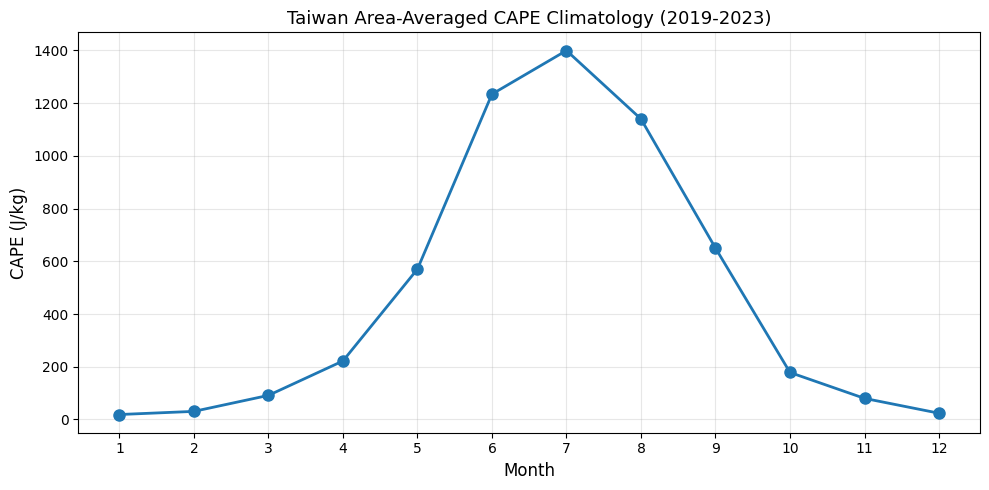

Interpretation:
  Max CAPE month: 7
  Min CAPE month: 1
  Summer mean (JJA): 1258 J/kg
  Winter mean (DJF): 24 J/kg


In [11]:
# Áπ™Âúñ
plt.figure(figsize=(10, 5))
result.plot(marker='o', linewidth=2, markersize=8)
plt.xlabel('Month', fontsize=12)
plt.ylabel('CAPE (J/kg)', fontsize=12)
plt.title('Taiwan Area-Averaged CAPE Climatology (2019-2023)', fontsize=13)
plt.grid(alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

print("Interpretation:")
print(f"  Max CAPE month: {result.values.argmax() + 1}")
print(f"  Min CAPE month: {result.values.argmin() + 1}")
print(f"  Summer mean (JJA): {result.sel(month=[6,7,8]).mean().values:.0f} J/kg")
print(f"  Winter mean (DJF): {result.sel(month=[12,1,2]).mean().values:.0f} J/kg")

## 4. Á©∫ÈñìÁµ±Ë®àÔºöË®àÁÆó Gradient

Âú®Ê∞£Ë±°ÂàÜÊûê‰∏≠ÔºåËÆäÊï∏ÁöÑÁ©∫ÈñìÊ¢ØÂ∫¶ÔºàgradientÔºâÂæàÈáçË¶ÅÔºö
- **Ê∫´Â∫¶Ê¢ØÂ∫¶**ÔºöÈãíÈù¢‰ΩçÁΩÆ
- **CAPE Ê¢ØÂ∫¶**ÔºöÂ∞çÊµÅÈÇäÁïå

Xarray Êèê‰æõ `.differentiate()` ‰æÜË®àÁÆóÂ∞éÊï∏„ÄÇ

Gradient calculation (still lazy):
  Type: <class 'dask.array.core.Array'>
  Shape: (121, 161)


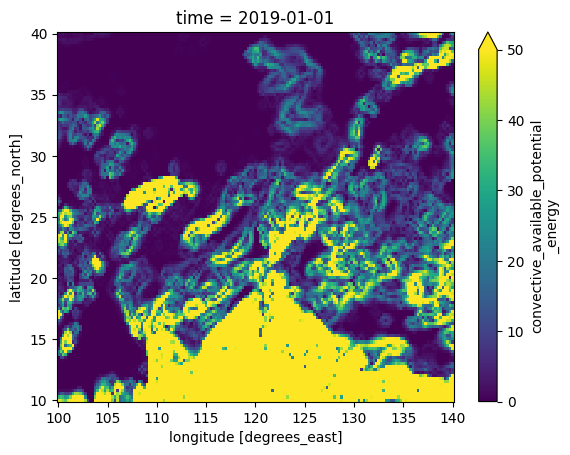

In [12]:
# ÈÅ∏Âèñ‰∏ÄÂÄãÊôÇÈñìÈªû
cape_snapshot = ds_all['convective_available_potential_energy'].isel(time=0)

# Ë®àÁÆóÁ∂ìÂêëÔºàlatitudeÔºâÊ¢ØÂ∫¶
# ÂñÆ‰ΩçÔºöCAPE per degree latitude
cape_grad_lat = cape_snapshot.differentiate('latitude')

# Ë®àÁÆóÁ∑ØÂêëÔºàlongitudeÔºâÊ¢ØÂ∫¶
cape_grad_lon = cape_snapshot.differentiate('longitude')

# Ë®àÁÆóÊ¢ØÂ∫¶Âº∑Â∫¶ÔºàmagnitudeÔºâ
cape_grad_mag = np.sqrt(cape_grad_lat**2 + cape_grad_lon**2)

print("Gradient calculation (still lazy):")
print(f"  Type: {type(cape_grad_mag.data)}")
print(f"  Shape: {cape_grad_mag.shape}")

cape_grad_mag.plot(cmap='viridis', vmin=0, vmax=50)

## 5. ËßÄÂØü Chunking ÂïèÈ°å

### ÁÇ∫‰ªÄÈ∫º Chunking ÂæàÈáçË¶ÅÔºü

Âú®ÈñãÂßã rechunking ‰πãÂâçÔºåËÆìÊàëÂÄëÂÖàÁúãÁúã**ÈåØË™§ÁöÑ chunking** ÊúÉÈÄ†Êàê‰ªÄÈ∫ºÂïèÈ°å„ÄÇ

ÊàëÂÄëÁöÑ ERA5 Ë≥áÊñôÊúâ‰∏ÄÂÄã chunking ÂïèÈ°åÔºö
- ÂéüÂßãÂÖ®ÁêÉË≥áÊñôÁöÑ chunks: `(1, 721, 1440)`
- subset Âà∞ÊàëÂÄëÂçÄÂüüÂæåËÆäÊàê: `(1, 121, 161)`
- ÈÄô‰ª£Ë°® **8760 ÂÄãÂæÆÂ∞è chunks**ÔºàÊØèÂÄãÊôÇÈñìÊ≠•‰∏ÄÂÄãÔºâ

ÈÄôÊúÉÂ∞éËá¥Ôºö
1. **Â§ßÈáè I/O overhead**ÔºöÊØèÊ¨°Êìç‰ΩúÈÉΩË¶ÅËÆÄÂèñÊï∏ÂçÉÂÄãÂ∞èÊ™îÊ°à
2. **Dask ÊéíÁ®ãÊàêÊú¨È´ò**Ôºö8760 ÂÄã tasks Ë¶ÅÁÆ°ÁêÜ
3. **Dashboard ÊªøÊòØÈªÉËâ≤ get-items**ÔºöÂèØ‰ª•Áõ¥Êé•ÁúãÂà∞ÂïèÈ°å

### ÂØ¶È©óÔºöÊØîËºÉ‰∏çÂêåÁöÑ chunking

In [13]:
# ËÆÄÂèñ„ÄåÂéüÂßã chunking„ÄçÁâàÊú¨ÔºàÊúâÂïèÈ°åÔºâ
print("=== ÂéüÂßã ChunkingÔºàÊúâÂïèÈ°åÔºâ===")
ds_raw = catalog.era5_2019_raw.to_dask()
cape_raw = ds_raw['convective_available_potential_energy']

print(f"Chunks: {cape_raw.chunks}")
print(f"Number of chunks: {cape_raw.data.npartitions}")

# Ë®àÁÆóÁ¨¨‰∏ÄÂÄã chunk ÁöÑÂ§ßÂ∞è
chunk_size_bytes = 1 * 121 * 161 * 4  # (1, 121, 161) * float32
chunk_size_kb = chunk_size_bytes / 1024
print(f"Single chunk size: {chunk_size_kb:.1f} KB")

if chunk_size_kb < 100:
    print("‚ö†Ô∏è  WARNING: ChunksÂ§™Â∞èÔºÅÔºà< 100 KBÔºâ")
    print("   ÈÄôÊúÉÂ∞éËá¥Â§ßÈáè overhead Âíå Dashboard ÁöÑÈªÉËâ≤ get-items\n")

# ËÆÄÂèñ„ÄåÂÑ™Âåñ chunking„ÄçÁâàÊú¨ÔºàÈÄèÈÅé catalog rechunkÔºâ
print("=== ÂÑ™Âåñ ChunkingÔºàcatalog rechunkÔºâ===")
ds_optimized = catalog.era5_2019_chunked.to_dask()
cape_opt = ds_optimized['convective_available_potential_energy']

print(f"Chunks: {cape_opt.chunks}")
print(f"Number of chunks: {cape_opt.data.npartitions}")

chunk_size_bytes = 744 * 121 * 161 * 4
chunk_size_mb = chunk_size_bytes / (1024**2)
print(f"Single chunk size: {chunk_size_mb:.1f} MB")

if 10 <= chunk_size_mb <= 100:
    print("‚úì Chunk size Âú®ÁêÜÊÉ≥ÁØÑÂúçÔºà10-100 MBÔºâ")

print(f"\nÊîπÂñÑÔºö{cape_raw.data.npartitions / cape_opt.data.npartitions:.0f}x Ê∏õÂ∞ë chunks Êï∏Èáè")

=== ÂéüÂßã ChunkingÔºàÊúâÂïèÈ°åÔºâ===
Chunks: ((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### Dashboard ËßÄÂØü

Âü∑Ë°å‰∏ÄÂÄãÁ∞°ÂñÆË®àÁÆóÔºåËßÄÂØüÂÖ©ËÄÖÂ∑ÆÁï∞Ôºö

**ÂéüÂßã chunking**ÔºöÊúÉÁúãÂà∞Â§ßÈáèÈªÉËâ≤Â°äÔºàget-itemsÔºâ  
**ÂÑ™Âåñ chunking**Ôºö‰πæÊ∑®ÁöÑË®àÁÆóÂúñÔºåÂ∞ëÈáè tasks

In [14]:
import time

# Â∞èÁØÑÂúçÊ∏¨Ë©¶ÔºàÈÅøÂÖçÁ≠âÂ§™‰πÖÔºâ
subset_raw = cape_raw.isel(time=slice(0, 100))  # Ââç 100 ÂÄãÊôÇÈñìÊ≠•
subset_opt = cape_opt.isel(time=slice(0, 100))

print("Ë®àÁÆó‰∏≠...Ë´ãËßÄÂØü Dashboard ÁöÑ Task Stream")
print("\nÂéüÂßã chunking:")
t0 = time.time()
result_raw = subset_raw.mean().compute()
time_raw = time.time() - t0
print(f"  ËÄóÊôÇ: {time_raw:.2f}s")

print("\nÂÑ™Âåñ chunking:")
t0 = time.time()
result_opt = subset_opt.mean().compute()
time_opt = time.time() - t0
print(f"  ËÄóÊôÇ: {time_opt:.2f}s")

print(f"\nÂä†ÈÄü: {time_raw / time_opt:.1f}x")

Ë®àÁÆó‰∏≠...Ë´ãËßÄÂØü Dashboard ÁöÑ Task Stream

ÂéüÂßã chunking:
  ËÄóÊôÇ: 0.42s

ÂÑ™Âåñ chunking:
  ËÄóÊôÇ: 0.04s

Âä†ÈÄü: 10.8x


In [15]:
# Step 1: ÈÅ∏ÂèñÂ∞èÁØÑÂúçË≥áÊñô
print("Step 1: ÈÅ∏ÂèñÂè∞ÁÅ£ÂçÄÂüüÁöÑ 7 ÊúàË≥áÊñô")

# ‰ΩøÁî®ÂéüÂßãÁöÑ raw dataset (ÊúâÂïèÈ°åÁöÑ chunking)
ds_subset = ds_raw.sel(
    time='2019-07',  # 7ÊúàÔºö744 ÂÄãÊôÇÈñìÊ≠•
    latitude=slice(26, 22),  # Âè∞ÁÅ£Á∑ØÂ∫¶ÁØÑÂúç
    longitude=slice(120, 122)  # Âè∞ÁÅ£Á∂ìÂ∫¶ÁØÑÂúç
)

print(f"Subset shape: {ds_subset['convective_available_potential_energy'].shape}")
print(f"Subset size: {ds_subset.nbytes / (1024**2):.1f} MB")
print(f"Current chunks: {ds_subset['convective_available_potential_energy'].chunks}")
print(f"Number of chunks: {ds_subset['convective_available_potential_energy'].data.npartitions}")
print("\n‚ö†Ô∏è  Ê≥®ÊÑèÔºöÈÄôÂÄãË≥áÊñôÊúâ 744 ÂÄãÂæÆÂ∞è chunksÔºàÊØèÂÄãÊôÇÈñìÊ≠•‰∏ÄÂÄãÔºâ")

Step 1: ÈÅ∏ÂèñÂè∞ÁÅ£ÂçÄÂüüÁöÑ 7 ÊúàË≥áÊñô
Subset shape: (744, 17, 9)
Subset size: 13.9 MB
Current chunks: ((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [16]:
# Step 1: ‰ΩøÁî® Rechunker ÈáçÊñ∞ÂÑ≤Â≠ò
from rechunker import rechunk
import tempfile
import shutil

# ÂÆöÁæ©ÁõÆÊ®ô chunks
# Á≠ñÁï•ÔºöÂÆåÊï¥ÁöÑÁ©∫ÈñìÁ∂≠Â∫¶ + ÂêàÁêÜÁöÑÊôÇÈñì chunks
target_chunks = {
    'time': 360,  # 15Â§©ÔºàÂçäÂÄãÊúàÔºâ
    'latitude': -1,  
    'longitude': -1
}

# Ë®àÁÆóÈ†êÊúüÁöÑ chunk size
expected_chunk_size = 360 * 4 * 2 * 4 * 4  # time √ó lat √ó lon √ó variables √ó float32
print(f"Expected single chunk size: {expected_chunk_size / (1024**2):.2f} MB")
print()

# Ëº∏Âá∫Ë∑ØÂæë
output_zarr = 'outputs/era5_tw_rechunked.zarr'
temp_zarr = 'outputs/temp_tw_rechunk.zarr'

# Ê∏ÖÁêÜËàäÊ™îÊ°àÔºàÂ¶ÇÊûúÂ≠òÂú®Ôºâ
for path in [output_zarr, temp_zarr]:
    if Path(path).exists():
        shutil.rmtree(path)
        print(f"Removed old: {path}")

# ‰ΩøÁî® rechunker
rechunk_plan = rechunk(
    ds_subset,
    target_chunks=target_chunks,
    max_mem='3GB',  # ÈôêÂà∂Ë®òÊÜ∂È´î‰ΩøÁî®
    target_store=output_zarr,
    temp_store=temp_zarr
)
rechunk_plan.execute()

# Ê∏ÖÁêÜËá®ÊôÇÊ™îÊ°à
shutil.rmtree(temp_zarr)

print("\n‚úì Rechunking ÂÆåÊàêÔºÅ")

Expected single chunk size: 0.04 MB

Removed old: outputs/era5_tw_rechunked.zarr
Removed old: outputs/temp_tw_rechunk.zarr

‚úì Rechunking ÂÆåÊàêÔºÅ


## 5.1 ÂãïÊâãÁ∑¥ÁøíÔºö‰ΩøÁî® Rechunker Ê∞∏‰πÖ‰øÆÂæ©

### ÂïèÈ°åÔºöcatalog rechunk Âè™ÊòØÊö´ÊôÇÊñπÊ°à

ÁõÆÂâçÊàëÂÄëÈÄèÈÅé `catalog.yaml` ÁöÑ `chunks` ÂèÉÊï∏‰æÜËß£Ê±∫ÂïèÈ°åÔºö
```yaml
era5_2019:
  args:
    chunks: {'time': 744, 'latitude': 121, 'longitude': 161}
```

‰ΩÜÈÄôÊúâÁº∫ÈªûÔºö
- ‚ùå **ÊØèÊ¨°ËÆÄÂèñÈÉΩË¶Å rechunk**ÔºöÊµ™Ë≤ª CPU ÂíåÊôÇÈñì
- ‚ùå **ÁÑ°Ê≥ïÈÅøÂÖçËÆÄÂèñÂéüÂßãÂ∞è chunks**ÔºöI/O overhead ‰æùÁÑ∂Â≠òÂú®
- ‚ùå **Ê≤ªÊ®ô‰∏çÊ≤ªÊú¨**ÔºöÂéüÂßã Zarr ÁöÑ chunking ‰æùÁÑ∂ÊòØÈåØÁöÑ

### Ëß£Ê±∫ÊñπÊ°àÔºö‰ΩøÁî® Rechunker Ê∞∏‰πÖ‰øÆÂæ©

`rechunker` library ÂèØ‰ª•Ôºö
- ‚úÖ ËÆÄÂèñÂéüÂßãË≥áÊñô‰∏ÄÊ¨°
- ‚úÖ ÈáçÊñ∞ÁµÑÁπîÁÇ∫ÊúÄ‰Ω≥ chunks
- ‚úÖ ÂÑ≤Â≠òÁÇ∫Êñ∞ÁöÑ ZarrÔºàÊ∞∏‰πÖÂÑ™ÂåñÔºâ
- ‚úÖ ‰ΩøÁî®Ëá®ÊôÇÂÑ≤Â≠òÁ©∫ÈñìÔºåÈÅøÂÖçË®òÊÜ∂È´îÁàÜÁÇ∏

### ÂØ¶‰ΩúÔºöRechunk Âè∞ÁÅ£ÂçÄÂüüÁöÑ 7 ÊúàË≥áÊñô

ÊàëÂÄëÊúÉÔºö
1. ÈÅ∏ÂèñÂ∞èÁØÑÂúçË≥áÊñôÔºàÂè∞ÁÅ£Ôºå2019Âπ¥7ÊúàÔºâ
2. ‰ΩøÁî® rechunker Ê≠£Á¢∫ÂÑ≤Â≠ò
3. È©óË≠â chunks ÊòØÂê¶Ê≠£Á¢∫
4. ÊØîËºÉÊ™îÊ°àÂ§ßÂ∞è

## 5. RechunkingÔºöÊúÄ‰Ω≥Âåñ Chunk Á≠ñÁï•

### ÁÇ∫‰ªÄÈ∫ºÈúÄË¶Å RechunkÔºü

ÂéüÂßã Zarr ÁöÑ chunking ÊòØ `(744, 121, 161)`ÔºàÊôÇÈñìÁ¥Ñ 1 ÂÄãÊúàÔºâ„ÄÇ

ÈÄôÈÅ©ÂêàÔºö
- ‚úÖ Ë®àÁÆóÊôÇÈñìÂπ≥Âùá„ÄÅÊôÇÈñìÂ∫èÂàóÂàÜÊûê
- ‚úÖ Á©∫ÈñìÂ†¥ÁöÑÊìç‰Ωú

‰ΩÜ**‰∏çÈÅ©Âêà**Ôºö
- ‚ùå ÂñÆÈªûÊàñÂ∞èÂçÄÂüüÁöÑÈï∑ÊôÇÈñìÂ∫èÂàó
- ‚ùå ML trainingÔºàÈúÄË¶ÅÊôÇÈñìÁ∂≠Â∫¶ÂàáÂ∞èÂ°äÔºâ

### Rechunking ÁöÑÊàêÊú¨

Rechunking **‰∏çÊòØÂÖçË≤ªÁöÑ**Ôºö
- ÈúÄË¶ÅËÆÄÂèñÊâÄÊúâÂéüÂßãË≥áÊñô
- ÈáçÊñ∞ÁµÑÁπî‰∏¶ÂØ´ÂÖ•Êñ∞ÁöÑ chunks
- I/O intensiveÔºàÂèØËÉΩÈúÄË¶ÅÊï∏Â∞èÊôÇÔºâ

Âõ†Ê≠§Ôºö
1. **ÂÖàÁ¢∫ÂÆöÂàÜÊûêÊ®°Âºè**ÂÜç rechunk
2. Rechunk ÁöÑÁµêÊûúÊáâË©≤**ÂÑ≤Â≠ò‰∏ã‰æÜ**Ôºå‰∏çË¶ÅÊØèÊ¨°ÈÉΩÈáçÊñ∞ÁÆó
3. ‰ΩøÁî® intermediate Zarr ‰ΩúÁÇ∫‰∏≠ÈñìÁî¢Áâ©

### 5.1 ÊÉÖÂ¢ÉÔºöÁÇ∫ ML Training ÊúÄ‰Ω≥Âåñ

Â∞çÊñºÂæåÁ∫åÁöÑ ML pipelineÔºåÊàëÂÄëÈúÄË¶ÅÔºö
- Â∞èÁöÑÊôÇÈñì batchÔºà‰æãÂ¶Ç 32 time stepsÔºâ
- ÂÆåÊï¥ÁöÑÁ©∫Èñì patchÔºà‰æãÂ¶Ç 16x16Ôºâ

ÁêÜÊÉ≥ÁöÑ chunkingÔºö`(32, 16, 16)`

In [17]:
# ‰ΩøÁî® daily mean Ë≥áÊñôÔºàÂ∑≤Á∂ìÂæû hourly ÈôçÂà∞ dailyÔºâ
ds_daily_all = ds_all.resample(time='1D').mean()

print("Before rechunk:")
print(f"  Original chunks: {ds_daily_all['cape'].chunks}")
print(f"  Total size: {ds_daily_all.nbytes / 1e9:.2f} GB")
print()

# Rechunk ÁÇ∫ÈÅ©Âêà ML ÁöÑÁµêÊßã
ds_rechunked = ds_daily_all.chunk({
    'time': 32,        # ÊØèÂÄã batch 32 Â§©
    'latitude': 16,    # 16x16 Á©∫Èñì patch
    'longitude': 16
})

print("After rechunk:")
print(f"  New chunks: {ds_rechunked['cape'].chunks}")
print(f"  Number of chunks: {ds_rechunked['cape'].data.npartitions}")
print()

# Ë®àÁÆóÂñÆ‰∏Ä chunk ÁöÑÂ§ßÂ∞è
chunk_size = 32 * 16 * 16 * 4  # float32 = 4 bytes
print(f"Single chunk size: {chunk_size / 1024:.2f} KB")
print(f"  Status: {chunk_size / (1024**2):.2f} MB - Âú®ÁêÜÊÉ≥ÁØÑÂúçÂÖß (10-100 MB)")

Before rechunk:


KeyError: "No variable named 'cape'. Variables on the dataset include ['100m_u_component_of_wind', '100m_v_component_of_wind', '10m_u_component_of_wind', '10m_v_component_of_wind', 'boundary_layer_height', ..., 'v_component_of_wind', 'latitude', 'level', 'longitude', 'time']"

### Chunk Size ÁöÑÊ¨äË°°

| Chunk Size | ÂÑ™Èªû | Áº∫Èªû | ÈÅ©Áî®ÊÉÖÂ¢É |
|------------|------|------|----------|
| < 1 MB | Ê•µÁ¥∞Á≤íÂ∫¶Âπ≥Ë°åÂåñ | Overhead ÈÅéÂ§ß | ‰∏çÊé®Ëñ¶ |
| 1-10 MB | È´òÂ∫¶Âπ≥Ë°åÂåñ | ÊéíÁ®ãÊàêÊú¨‰ªçÈ´ò | Â§ßÈáè workers |
| **10-100 MB** | **Âπ≥Ë°°** | **- ** | **Â§ßÂ§öÊï∏ÊÉÖÊ≥Å** |
| 100-500 MB | ‰Ωé overhead | Âπ≥Ë°åÂ∫¶ÂèóÈôê | Â∞ëÈáèË§áÈõúË®àÁÆó |
| > 500 MB | ÊúÄ‰Ωé overhead | Ë®òÊÜ∂È´îÂ£ìÂäõ„ÄÅÁÑ°Ê≥ïÂπ≥Ë°å | ‰∏çÊé®Ëñ¶ |

ÊàëÂÄëÁöÑ 32 KB Â§™Â∞è‰∫ÜÔºÅËÆìÊàëÂÄëË™øÊï¥Ôºö

In [ ]:
# Êõ¥ÂêàÁêÜÁöÑ chunking
ds_rechunked = ds_daily_all.chunk({
    'time': 32,        # 32 Â§©
    'latitude': 60,    # 60 ÂÄãÁ∑ØÂ∫¶Èªû
    'longitude': 80    # 80 ÂÄãÁ∂ìÂ∫¶Èªû
})

chunk_size = 32 * 60 * 80 * 4 * 4  # 4 variables, float32
print(f"Optimized chunk size: {chunk_size / (1024**2):.2f} MB")
print(f"Number of chunks per variable: {ds_rechunked['cape'].data.npartitions}")
print(f"Total chunks (4 variables): {ds_rechunked['cape'].data.npartitions * 4}")

## 6. ÂÑ≤Â≠òÁÇ∫ ZarrÔºöÂõ∫Âåñ‰∏≠ÈñìÁµêÊûú

### ÁÇ∫‰ªÄÈ∫ºË¶ÅÂÑ≤Â≠ò‰∏≠ÈñìÁµêÊûúÔºü

ÂÅáË®≠ÊàëÂÄëÁöÑ workflow ÊòØÔºö
1. ËÆÄÂèñ 5 Âπ¥ hourly Ë≥áÊñô
2. Resample Âà∞ daily
3. Rechunk
4. Áî®Êñº ML training

Â¶ÇÊûúÊØèÊ¨° training ÈÉΩÈáçË§á 1-3 Ê≠•È©üÔºö
- ÊØèÊ¨°ÈÉΩË¶ÅËÆÄÂèñ ~135 GB ÂéüÂßãË≥áÊñô
- ÈáçË§áË®àÁÆó resampleÔºàËÄóË≤ª CPUÔºâ
- ÈáçË§á rechunkÔºàÂ§ßÈáè I/OÔºâ

**Êõ¥Â•ΩÁöÑÂÅöÊ≥ï**Ôºö
1. ÁÆó‰∏ÄÊ¨° daily + rechunked Ë≥áÊñô
2. ÂÑ≤Â≠òÁÇ∫Êñ∞ÁöÑ ZarrÔºàÂèØËÉΩ ~6 GBÔºâ
3. ÂæåÁ∫åÁõ¥Êé•ËÆÄÂèñÈÄôÂÄãÂÑ™ÂåñÈÅéÁöÑ Zarr

### 6.1 Ê∫ñÂÇôË¶ÅÂÑ≤Â≠òÁöÑË≥áÊñô

In [ ]:
# ÈÅ∏ÂèñÂ∞èÁØÑÂúçË≥áÊñôÔºöÂè∞ÁÅ£ÂçÄÂüü + 7Êúà + Âè™ÈÅ∏ÂπæÂÄãËÆäÊï∏
# ÈÄôÊ®£ÂÑ≤Â≠òÊúÉÂø´ÂæàÂ§öÔºåÈÅ©ÂêàÁ§∫ÁØÑÁî®ÈÄî
ds_to_save = ds.sel(
    time='2019-07',  # Âè™ÈÅ∏ 7 ÊúàÔºà31 Â§©Ôºâ
    latitude=slice(26, 22),  # Âè∞ÁÅ£Á∑ØÂ∫¶
    longitude=slice(120, 124)  # Âè∞ÁÅ£Á∂ìÂ∫¶
)[['convective_available_potential_energy', 
   'convective_inhibition', 
   'k_index', 
   'boundary_layer_height']]  # Âè™ÈÅ∏ 4 ÂÄãËÆäÊï∏

# Resample Âà∞ daily
ds_to_save = ds_to_save.resample(time='1D').mean()

# Rechunk Âà∞ÈÅ©ÂêàÁöÑÁµêÊßã
ds_to_save = ds_to_save.chunk({
    'time': 31,  # Êï¥ÂÄã 7 Êúà
    'latitude': 17,  # ÂÆåÊï¥ÁöÑÁ∑ØÂ∫¶ÁØÑÂúç
    'longitude': 17   # ÂÆåÊï¥ÁöÑÁ∂ìÂ∫¶ÁØÑÂúç
})

print("Dataset to save (Â∞èÁØÑÂúçÁ§∫ÁØÑ):")
print(ds_to_save)
print()
print(f"Size: {ds_to_save.nbytes / (1024**2):.2f} MB")
print("ÈÄôÊòØ‰∏ÄÂÄãÂ∞èÁØÑÂúçÁöÑÁ§∫ÁØÑË≥áÊñôÔºåÂÑ≤Â≠òÊúÉÂæàÂø´ÔºÅ")

### 6.2 ÂÑ≤Â≠òÁÇ∫ Zarr

Zarr ÁöÑÂÑ≤Â≠òÂèÉÊï∏Ôºö

1. **mode='w'**: Ë¶ÜÂØ´Ê®°ÂºèÔºàÂ∞èÂøÉÔºÅÊúÉÂà™Èô§ËàäË≥áÊñôÔºâ
2. **consolidated=True**: Â∞á metadata ÈõÜ‰∏≠ÂÑ≤Â≠ò
   - ÂÑ™ÈªûÔºöÊ∏õÂ∞ëËÆÄÂèñÊôÇÁöÑ HTTP requestsÔºàÈõ≤Á´ØÂèãÂñÑÔºâ
   - Áº∫ÈªûÔºö‰∏çÊîØÊè¥ appendÔºàÂ∞çÊàëÂÄëÊ≤íÂΩ±ÈüøÔºâ
3. **encoding**: Ë®≠ÂÆöÂ£ìÁ∏Æ„ÄÅchunking
   - compressor: ‰ΩøÁî® Blosc Â£ìÁ∏ÆÔºàCPU-friendlyÔºâ
   - chunks: ÊòéÁ¢∫ÊåáÂÆö chunk shape

In [ ]:
from numcodecs import Blosc

# Ëº∏Âá∫Ë∑ØÂæëÔºàÊîπÊàêÊõ¥ÊúâÊÑèÁæ©ÁöÑÂêçÁ®±Ôºâ
output_path = 'outputs/era5_taiwan_july_daily.zarr'

# Ë®≠ÂÆö encodingÔºàÂ£ìÁ∏ÆËàá chunkingÔºâ
compressor = Blosc(cname='zstd', clevel=3, shuffle=Blosc.SHUFFLE)

encoding = {
    var: {
        'compressor': compressor,
        'chunks': (31, 17, 17)  # ÊòéÁ¢∫ÊåáÂÆö chunk shape
    }
    for var in ds_to_save.data_vars
}

print("Saving to Zarr...")
print(f"  Output: {output_path}")
print(f"  Compressor: Blosc (zstd, level 3)")
print(f"  Chunks: (31, 17, 17)")
print(f"  Size: ~{ds_to_save.nbytes / (1024**2):.2f} MB (Â∞èÊ™îÊ°àÔºåÂÑ≤Â≠òÂæàÂø´ÔºÅ)")
print()

# Âü∑Ë°åÂÑ≤Â≠ò
# compute=True: Á´ãÂç≥Âü∑Ë°åÔºàËÄå‰∏çÊòØ lazyÔºâ
# consolidated=True: Âª∫Á´ã .zmetadata
ds_to_save.to_zarr(
    output_path,
    mode='w',
    encoding=encoding,
    consolidated=True
)

print("‚úì Saved successfully!")

### ÂÑ≤Â≠òÈÅéÁ®ãË™™Êòé

ÈÄôÂÄãÊìç‰ΩúÊúÉÔºö
1. **ËÆÄÂèñÂéüÂßã Zarr**ÔºöÂè™ËÆÄÂèñÂè∞ÁÅ£ÂçÄÂüü 7 ÊúàÁöÑË≥áÊñôÔºàÂæàÂ∞èÔºÅÔºâ
2. **Âü∑Ë°å resample**Ôºöhourly ‚Üí daily mean
3. **Â£ìÁ∏Æ**Ôºö‰ΩøÁî® Blosc Â£ìÁ∏ÆÔºàÁ¥Ñ 30-50% Â£ìÁ∏ÆÁéáÔºâ
4. **ÂØ´ÂÖ•Êñ∞ Zarr**ÔºöÂà∞ `outputs/` ÁõÆÈåÑ
5. **Âª∫Á´ã consolidated metadata**ÔºöÂä†ÈÄüÂæåÁ∫åËÆÄÂèñ

**Ê≥®ÊÑè**ÔºöÈÄôË£°ÊàëÂÄëÂÑ≤Â≠òÁöÑÊòØ**Â∞èÁØÑÂúçÁ§∫ÁØÑË≥áÊñô**ÔºàÂè∞ÁÅ£ 7 ÊúàÔºâÔºåÊâÄ‰ª•Âè™ÈúÄË¶Å**ÂπæÁßíÈêò**ÔºÅ
Â¶ÇÊûúË¶ÅÂÑ≤Â≠òÂÆåÊï¥ÁöÑ 2019 Âπ¥ÂÖ®ÂçÄÂüüË≥áÊñôÔºåÊúÉÈúÄË¶ÅÊï∏ÂàÜÈêòÂà∞Êï∏ÂçÅÂàÜÈêò„ÄÇ

**ËßÄÂØüÂª∫Ë≠∞**ÔºöÂàáÊèõÂà∞ Dask Dashboard ÁöÑ Task StreamÔºåÁúãÂà∞Âπ≥Ë°åÁöÑ read ‚Üí compute ‚Üí write ‰ªªÂãô„ÄÇ

### 6.3 È©óË≠âÂÑ≤Â≠òÁµêÊûú

In [ ]:
# ÈáçÊñ∞ËÆÄÂèñÂâõÂÑ≤Â≠òÁöÑ Zarr
ds_loaded = xr.open_zarr(output_path, consolidated=True)

print("Loaded dataset:")
print(ds_loaded)
print()
print(f"Chunks: {ds_loaded['convective_available_potential_energy'].chunks}")
print()

# È©óË≠âË≥áÊñôÊ≠£Á¢∫ÊÄßÔºöË®àÁÆó‰∏ÄÂÄãÁ∞°ÂñÆÁµ±Ë®àÈáè
original_mean = ds_to_save['convective_available_potential_energy'].mean().compute()
loaded_mean = ds_loaded['convective_available_potential_energy'].mean().compute()

print("Verification:")
print(f"  Original mean: {original_mean.values:.2f}")
print(f"  Loaded mean: {loaded_mean.values:.2f}")
print(f"  Difference: {abs(original_mean.values - loaded_mean.values):.6f}")
print(f"  Status: {'‚úì Match' if abs(original_mean.values - loaded_mean.values) < 0.01 else '‚úó Mismatch'}")

### 6.4 Ê™¢Êü•Á£ÅÁ¢üÁ©∫Èñì‰ΩøÁî®

In [ ]:
import subprocess

# ‰ΩøÁî® du Êåá‰ª§Êü•ÁúãÁõÆÈåÑÂ§ßÂ∞è
result = subprocess.run(
    ['du', '-sh', output_path],
    capture_output=True,
    text=True
)

print(f"Disk usage: {result.stdout.strip()}")
print()
print("Comparison:")
print(f"  Original (7Êúà hourly, 4 variables): ~{ds_to_save.nbytes * 24 / (1024**2):.1f} MB (Êú™Â£ìÁ∏Æ)")
print(f"  Saved (7Êúà daily, compressed): see above")
print(f"  Size reduction: {ds_to_save.nbytes * 24 / (1024**2) / float(result.stdout.split()[0].replace('M', '')):.1f}x (resample + compression)")

## 7. Â£ìÁ∏ÆÈÅ∏È†ÖÊØîËºÉ

‰∏çÂêåÁöÑÂ£ìÁ∏ÆÂô®Êúâ‰∏çÂêåÁöÑÊ¨äË°°Ôºö

| Compressor | Â£ìÁ∏ÆÁéá | Â£ìÁ∏ÆÈÄüÂ∫¶ | Ëß£Â£ìÈÄüÂ∫¶ | ÈÅ©Áî®ÊÉÖÂ¢É |
|------------|--------|----------|----------|----------|
| None | 1.0x | - | - | Âø´ÈÄüÂéüÂûã„ÄÅSSD |
| Blosc (lz4) | 2-3x | Ê•µÂø´ | Ê•µÂø´ | È†êË®≠ÈÅ∏Êìá |
| **Blosc (zstd)** | **3-5x** | **Âø´** | **Âø´** | **Êé®Ëñ¶** |
| gzip | 4-6x | ÊÖ¢ | ‰∏≠ | Èï∑ÊúüÂ∞ÅÂ≠ò„ÄÅÁ∂≤Ë∑ØÂÇ≥Ëº∏ |
| zlib | 3-5x | ÊÖ¢ | ‰∏≠ | Áõ∏ÂÆπÊÄßÂÑ™ÂÖà |

**ÊàëÂÄë‰ΩøÁî® Blosc (zstd, level=3)**Ôºö
- Âπ≥Ë°°Â£ìÁ∏ÆÁéáËàáÈÄüÂ∫¶
- CPU overhead ‰ΩéÔºàÈáçË¶ÅÔºÅÂõ†ÁÇ∫ÊàëÂÄëÈÇÑË¶ÅÂÅöË®àÁÆóÔºâ
- Ëß£Â£ìÂø´ÈÄüÔºàËÆÄÂèñÊôÇ‰∏çÊúÉÊàêÁÇ∫Áì∂È†∏Ôºâ

Â¶ÇÊûúÈúÄË¶ÅÊõ¥È´òÂ£ìÁ∏ÆÁéáÔºà‰æãÂ¶ÇË≥áÊñôË¶ÅÂÇ≥Ëº∏Âà∞ÂÖ∂‰ªñÂú∞ÊñπÔºâÔºåÂèØ‰ª•Áî®Ôºö
```python
compressor = Blosc(cname='zstd', clevel=9, shuffle=Blosc.BITSHUFFLE)
```

## 8. Ê™¢Êü•ÈªûÔºö‰Ω†ÊáâË©≤ÁêÜËß£ÁöÑÊ¶ÇÂøµ

ÂÆåÊàêÈÄôÂÄã notebook ÂæåÔºå‰Ω†ÊáâË©≤ËÉΩÂ§†Ôºö

- [ ] ‰ΩøÁî® `.resample()` ÈÄ≤Ë°åÊôÇÈñìËÅöÂêà
- [ ] ‰ΩøÁî® `.groupby()` Ë®àÁÆóÊ∞£ÂÄôÊÖã
- [ ] Áî® `xr.concat()` ‰∏≤Êé•Â§öÂÄã Dataset
- [ ] ÁêÜËß£ rechunking ÁöÑÊôÇÊ©üÂíåÊàêÊú¨
- [ ] Ê†πÊìöÂàÜÊûêÊ®°ÂºèÈÅ∏ÊìáÂêàÈÅ©ÁöÑ chunk size
- [ ] Ê≠£Á¢∫Ë®≠ÂÆöÂ£ìÁ∏ÆÂèÉÊï∏‰∏¶ÂÑ≤Â≠ò Zarr
- [ ] ‰ΩøÁî® consolidated metadata Âä†ÈÄüËÆÄÂèñ

### Workflow Á∏ΩÁµê

ËôïÁêÜÂ§ßÂûã N-D array ÁöÑÊ®ôÊ∫ñÊµÅÁ®ãÔºö

```
ÂéüÂßãË≥áÊñô (Zarr)
    ‚Üì (lazy operations)
ÈÅ∏Âèñ / ÂàáÁâá / ËÅöÂêà
    ‚Üì
RechunkÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
    ‚Üì (.to_zarr())
ÂÑ™ÂåñÁöÑ‰∏≠Èñì Zarr
    ‚Üì (Áî®ÊñºÂæåÁ∫åÂàÜÊûê)
ML / Ë¶ñË¶∫Âåñ / Áµ±Ë®à
```

ÈóúÈçµÔºö**ÊääËÄóÊôÇÁöÑÂâçËôïÁêÜÂÅö‰∏ÄÊ¨°ÔºåÂÑ≤Â≠ò‰∏ã‰æÜÔºåÈáçË§á‰ΩøÁî®**„ÄÇ

## 9. Â∞èÁ∑¥ÁøíÔºàÂèØÈÅ∏Ôºâ

1. **Ë®àÁÆóÂ≠£ÁØÄÊ∞£ÂÄôÊÖã**Ôºö‰ΩøÁî® `.groupby('time.season')` Ë®àÁÆó DJF, MAM, JJA, SON ÁöÑ CAPE Âπ≥Âùá
2. **Áï∞Â∏∏ÂÄºÂÅµÊ∏¨**ÔºöÊâæÂá∫ CAPE > 5000 J/kg ÁöÑÊ•µÁ´Ø‰∫ã‰ª∂ÔºåÁµ±Ë®àÁôºÁîüÈ†ªÁéá
3. **ÂØ¶È©ó chunking**ÔºöÊØîËºÉ‰∏çÂêå chunk Á≠ñÁï•Â∞ç `.mean(dim='time')` ÁöÑÂΩ±Èüø
4. **Â£ìÁ∏ÆÁéáÊ∏¨Ë©¶**ÔºöÁî®‰∏çÂêåÁöÑ compressor ÂÑ≤Â≠òÁõ∏ÂêåË≥áÊñôÔºåÊØîËºÉÁ£ÅÁ¢üÁ©∫ÈñìÂíåÈÄüÂ∫¶

## ‰∏ã‰∏ÄÊ≠•

Âú® **Notebook 3** ‰∏≠ÔºåÊàëÂÄëÊúÉÈÄ≤ÂÖ• ML PipelineÔºö
- ÂÆöÁæ©Â∞çÊµÅÂàÜÈ°û‰ªªÂãôÔºà‰ªÄÈ∫ºÊôÇÂÄôÁÆó„ÄåÂ∞çÊµÅ„ÄçÔºüÔºâ
- ‰ΩøÁî® xbatcher Áî¢ÁîüË®ìÁ∑¥ batches
- Êï¥Âêà PyTorch DataLoader
- Ë®ìÁ∑¥‰∏ÄÂÄãÁ∞°ÂñÆÁöÑ CNN Ê®°Âûã
- Áî® xskillscore ÈÄ≤Ë°åÁ©∫ÈñìÈ©óË≠â

ÈÄôÊòØÊï¥ÂÄã workshop ÁöÑÈ´òÊΩÆÔºåÊúÉÂ±ïÁ§∫ÂÆåÊï¥ÁöÑ„ÄåÂ§ßÂûãÈô£Âàó ‚Üí ML„ÄçÂ∑•‰ΩúÊµÅ„ÄÇ

In [ ]:
# Â¶ÇÊûúË¶ÅÈóúÈñâ ClientÔºàÈáãÊîæË≥áÊ∫êÔºâ
# client.close()